In [1]:
import MDAnalysis
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import itertools
import warnings

warnings.filterwarnings('ignore')

/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/chemfiles.py:82: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion
/home/utilizzatore/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/TRJ.py:1209: DeprecationWarning: Please use `netcdf_file` from the `scipy.io` namespace, the `scipy.io.netcdf` namespace is deprecated.
  class NCDFPicklable(scipy.io.netcdf.netcdf_file):


## Fig 5

In [3]:
results_0M_20 = np.load('results_pairs_ACTR_0M_20.npy', allow_pickle=True)
results_0M_20_df = pd.DataFrame.from_records(results_0M_20)

In [4]:
results_0M_20_ws = np.load('results_pairs_ACTR_0M_ws_20.npy', allow_pickle=True)
results_0M_20_ws_df = pd.DataFrame.from_records(results_0M_20_ws)

In [5]:
# CREATE DF NORMAL VS REWEIGHTED
Ex_0M = np.tile([0.61, 0.47, 0.61], 2)

Es_0M = np.array(results_0M_20_df['Es'])
Es_0M_ws = np.array(results_0M_20_ws_df['Es'])

Ed_0M = np.array(results_0M_20_df['Ed'])
Ed_0M_ws = np.array(results_0M_20_ws_df['Ed'])

Ed2_0M = np.array(results_0M_20_df['Ed2'])
Ed2_0M_ws = np.array(results_0M_20_ws_df['Ed2'])

E_avg_0M = np.average([Es_0M, Ed_0M, Ed2_0M], axis=0)
E_avg_0M_ws = np.average([Es_0M_ws, Ed_0M_ws, Ed2_0M_ws], axis=0)

res_0M = np.tile(['3-61', '3-75', '33-75', '3-61', '3-75', '33-75'], 5)
allE_0M = np.concatenate([Ex_0M, Es_0M_ws, Es_0M, 
                          Ed_0M_ws, Ed_0M,
                          Ed2_0M_ws, Ed2_0M,
                          E_avg_0M_ws, E_avg_0M])

type_0M = np.tile(['Reweighted', 'Reweighted', 'Reweighted', 'Normal', 'Normal', 'Normal'], 5)
name_0M = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], 6)
ACTR_0M_ws_df = pd.DataFrame({'E': allE_0M, 'name': name_0M, 
                            'res': res_0M, 'type': type_0M})

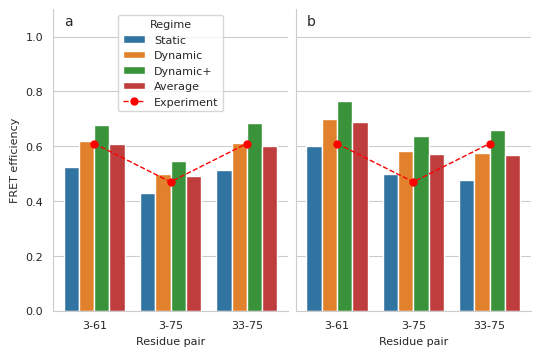

In [6]:
# PLOT
sns.set_style('whitegrid')

g = sns.catplot(data=ACTR_0M_ws_df.loc[(ACTR_0M_ws_df['name'] != 'Ex')], 
                x='res', y='E', hue='name', col='type',
                kind="bar", legend=False)

ax = g.axes

g.fig.set_size_inches(5.2, 3.7)

ax[0, 0].errorbar(['3-61', '3-75', '33-75'], Ex_0M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red')

ax[0, 1].errorbar(['3-61', '3-75', '33-75'], Ex_0M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red')

for cols in [0, 1]:
    
    ax[0, cols].set_ylim(0, 1.1)
        
    for label in (ax[0, cols].get_xticklabels() + ax[0, cols].get_yticklabels()):
        label.set_fontsize(8)
        
ax[0, 0].set_ylabel('FRET efficiency', fontsize=8)
ax[0, 0].set_xlabel('Residue pair', fontsize=8)
ax[0, 1].set_xlabel('Residue pair', fontsize=8)

ax[0, 0].set_title(None)
ax[0, 1].set_title(None)

ax[0, 0].text(-0.4, 1.04, 'a', fontsize=10)
ax[0, 1].text(-0.4, 1.04, 'b', fontsize=10)

ax[0, 0].legend(loc='upper center', title='Regime', title_fontsize=8, fontsize=8)

# g.savefig('Fig5.eps')

## Fig S9

In [7]:
results_2_5M_20 = np.load('results_pairs_ACTR_2_5M_20.npy', allow_pickle=True)
results_2_5M_20_df = pd.DataFrame.from_records(results_2_5M_20)

In [8]:
results_2_5M_20_ws = np.load('results_pairs_ACTR_2_5M_ws_20.npy', allow_pickle=True)
results_2_5M_20_ws_df = pd.DataFrame.from_records(results_2_5M_20_ws)

In [9]:
results_5M_20 = np.load('results_pairs_ACTR_5M_20.npy', allow_pickle=True)
results_5M_20_df = pd.DataFrame.from_records(results_5M_20)

In [10]:
results_5M_20_ws = np.load('results_pairs_ACTR_5M_ws_20.npy', allow_pickle=True)
results_5M_20_ws_df = pd.DataFrame.from_records(results_5M_20_ws)

In [11]:
# CREATE DF NORMAL VS REWEIGHTED 2.5 M + 5 M
Ex_2_5M = np.tile([0.49, 0.38, 0.51], 2)

Es_2_5M = np.array(results_2_5M_20_df['Es'])
Es_2_5M_ws = np.array(results_2_5M_20_ws_df['Es'])

Ed_2_5M = np.array(results_2_5M_20_df['Ed'])
Ed_2_5M_ws = np.array(results_2_5M_20_ws_df['Ed'])

Ed2_2_5M = np.array(results_2_5M_20_df['Ed2'])
Ed2_2_5M_ws = np.array(results_2_5M_20_ws_df['Ed2'])

E_avg_2_5M = np.average([Es_2_5M, Ed_2_5M, Ed2_2_5M], axis=0)
E_avg_2_5M_ws = np.average([Es_2_5M_ws, Ed_2_5M_ws, Ed2_2_5M_ws], axis=0)

res_2_5M = np.tile(['3-61', '3-75', '33-75', '3-61', '3-75', '33-75'], 5)
allE_2_5M = np.concatenate([Ex_2_5M, Es_2_5M_ws, Es_2_5M,
                            Ed_2_5M_ws, Ed_2_5M,
                            Ed2_2_5M_ws, Ed2_2_5M, 
                            E_avg_2_5M_ws, E_avg_2_5M])

type_2_5M = np.tile(['Reweighted', 'Reweighted', 'Reweighted', 'Normal', 'Normal', 'Normal'], 5)
name_2_5M = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], 6)
concentration_2_5M = np.repeat('2.5 M', 30)
ACTR_2_5M_ws_df = pd.DataFrame({'E': allE_2_5M, 'name': name_2_5M, 
                                'res': res_2_5M, 'type': type_2_5M, 
                                'concentration': concentration_2_5M})


Ex_5M = np.tile([0.42, 0.34, 0.46], 2)

Es_5M = np.array(results_5M_20_df['Es'])
Es_5M_ws = np.array(results_5M_20_ws_df['Es'])

Ed_5M = np.array(results_5M_20_df['Ed'])
Ed_5M_ws = np.array(results_5M_20_ws_df['Ed'])

Ed2_5M = np.array(results_5M_20_df['Ed2'])
Ed2_5M_ws = np.array(results_5M_20_ws_df['Ed2'])

E_avg_5M = np.average([Es_5M, Ed_5M, Ed2_5M], axis=0)
E_avg_5M_ws = np.average([Es_5M_ws, Ed_5M_ws, Ed2_5M_ws], axis=0)

res_5M = np.tile(['3-61', '3-75', '33-75', '3-61', '3-75', '33-75'], 5)
allE_5M = np.concatenate([Ex_5M, Es_5M_ws, Es_5M,
                          Ed_5M_ws, Ed_5M,
                          Ed2_5M_ws, Ed2_5M, 
                          E_avg_5M_ws, E_avg_5M])

type_5M = np.tile(['Reweighted', 'Reweighted', 'Reweighted', 'Normal', 'Normal', 'Normal'], 5)
name_5M = np.repeat(['Ex', 'Static', 'Dynamic', 'Dynamic+', 'Average'], 6)
concentration_5M = np.repeat('5 M', 30)
ACTR_5M_ws_df = pd.DataFrame({'E': allE_5M, 'name': name_5M, 
                              'res': res_5M, 'type': type_5M, 
                              'concentration': concentration_5M})

ACTR_2_5_5_ws_df = pd.concat([ACTR_2_5M_ws_df, ACTR_5M_ws_df], ignore_index=True)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


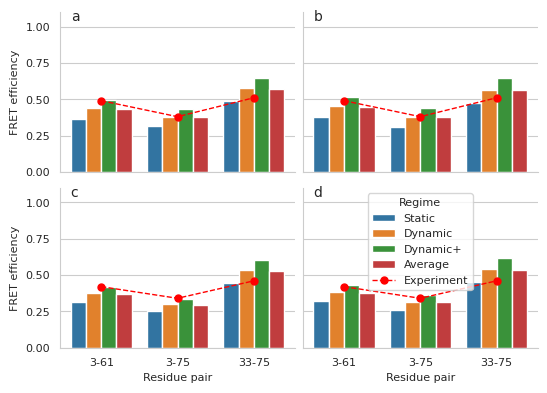

In [23]:
# PLOT 2.5 M + 5 M
sns.set_style('whitegrid')

g = sns.catplot(data=ACTR_2_5_5_ws_df.loc[(ACTR_2_5_5_ws_df['name'] != 'Ex')], 
                x='res', y='E', hue='name', col='type', row='concentration',
                kind="bar", legend=False)

ax = g.axes

g.fig.set_size_inches(5.2, 3.7)

ax[0, 0].errorbar(['3-61', '3-75', '33-75'], Ex_2_5M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red')

ax[0, 1].errorbar(['3-61', '3-75', '33-75'], Ex_2_5M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red')

ax[1, 0].errorbar(['3-61', '3-75', '33-75'], Ex_5M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red')

ax[1, 1].errorbar(['3-61', '3-75', '33-75'], Ex_5M[0:3], linewidth=1, 
                  marker='.', markersize=10, label='Experiment', linestyle='dashed', color='red')

for row in [0, 1]:
    for cols in [0, 1]:
        
        ax[row, cols].set_ylim(0, 1.1)
        
        for label in (ax[row, cols].get_xticklabels() + ax[row, cols].get_yticklabels()):
            label.set_fontsize(8)
        
ax[0, 0].set_ylabel('FRET efficiency', fontsize=8)
ax[1, 0].set_ylabel('FRET efficiency', fontsize=8)

ax[1, 0].set_xlabel('Residue pair', fontsize=8)
ax[1, 1].set_xlabel('Residue pair', fontsize=8)

ax[0, 0].set_title(None)
ax[0, 1].set_title(None)

ax[1, 0].set_title('', fontsize=8)
ax[1, 1].set_title('', fontsize=8)

ax[1, 1].legend(loc='upper center', title='Regime', title_fontsize=8, fontsize=8)

# Letters
ax[0, 0].text(-0.4, 1.04, 'a', fontsize=10)
ax[1, 0].text(-0.4, 1.04, 'c', fontsize=10)

ax[0, 1].text(-0.4, 1.04, 'b', fontsize=10)
ax[1, 1].text(-0.4, 1.04, 'd', fontsize=10)


# plt.tight_layout()

# g.savefig('ACTR_2_5_5M_cutoff20_reweighting.eps')